## UCD PA - Data Analytics for Business - Final Project
Charlotte McCarthy
<br>10/02/2022

In [1]:
#Importing the necessary Python packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

### Importing the Data

In [ ]:
#Optional code to connect to a database and import data directly from the database. 
#To run this code you would first need to configure your database ODBC connection and then update the code with your database connection details

connection_string = ("Server=Your_Server_Name;"
            "Database=My_Database_Name;"
            "UID=Your_User_ID;"
            "PWD=Your_Password;")

connection = pyodbc.connect(connection_string)
query = 'SELECT * TABLE'

data = pd.read_sql(query, connection)

In [5]:
#Importing data from a csv file into a Pandas dataframe
data = pd.read_csv('C:/Users/mccarthyc1/Documents/GitHub/UDCPA_CharlotteMcCarthy/Data/supermarket_sales.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


### Analysing the Data

In [ ]:
#Looking at the data type of each column
data.dtypes

In [ ]:
#Splitting the data into seperate object and numeric dataframes
objects = data.select_dtypes('object')
numeric = data.select_dtypes(exclude = 'object')

In [ ]:
#Using describe function on the object data
objects.describe()

In [ ]:
#Using describe function on the object data
numeric.describe()

In [6]:
#Convert time and date columns from Objects to date and time
data['Date'] =  pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Time'] =  pd.to_datetime(data['Time'], format='%H:%M').dt.time

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
#Checking for null values
data.isnull().sum()

### Visualising the Data

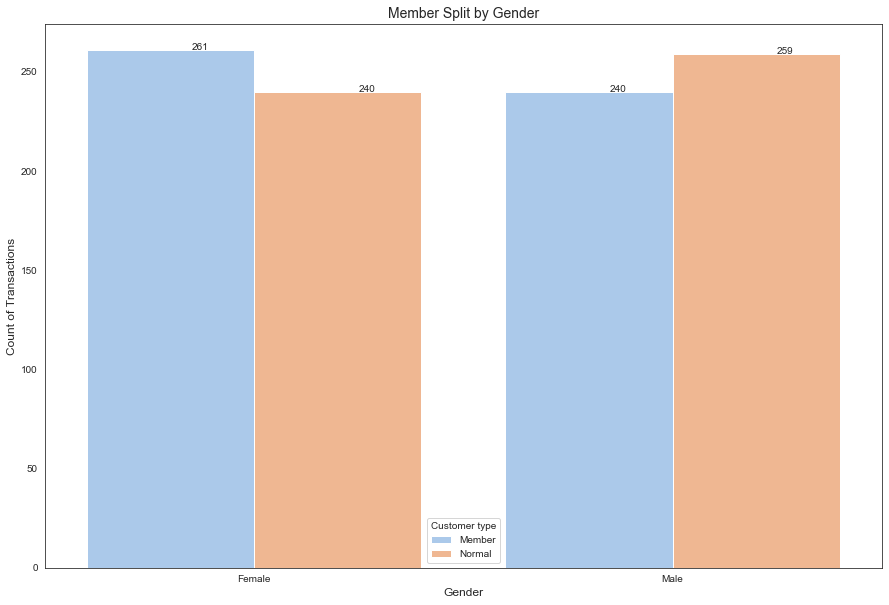

In [17]:
#Using Seaborn and MatPlotLib to create charts
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Gender', hue='Customer type', data=data , palette = 'pastel')
ax.set_xlabel("Gender", fontsize = 12)
ax.set_ylabel("Count of Transactions", fontsize = 12)
ax.set_title("Member Split by Gender", fontsize = 14)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.savefig('../data/charts/Member-Split-By-Gender.png')

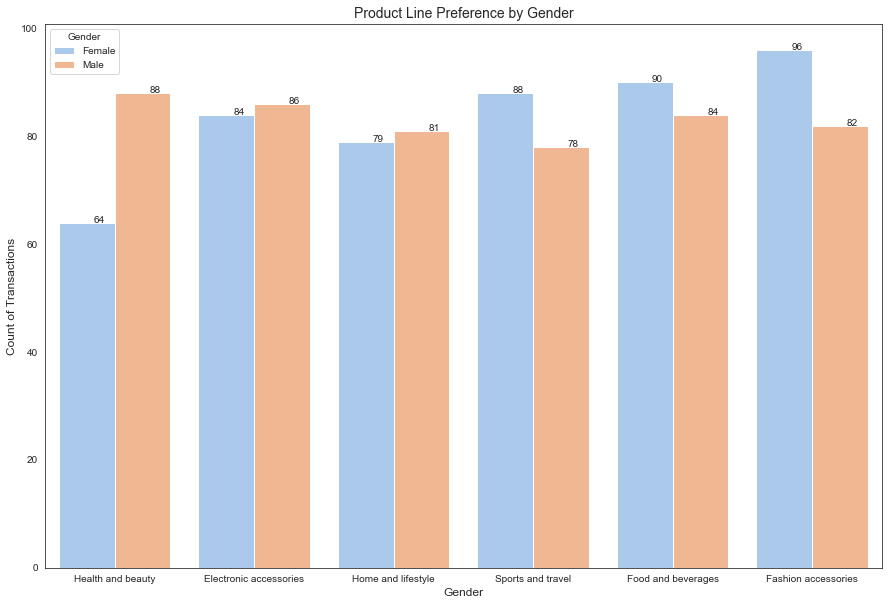

In [18]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Product line', hue='Gender', data=data , palette = 'pastel')
ax.set_xlabel("Gender", fontsize = 12)
ax.set_ylabel("Count of Transactions", fontsize = 12)
ax.set_title("Product Line Preference by Gender", fontsize = 14)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.savefig('../data/charts/product-line-preference-by-gender.png')

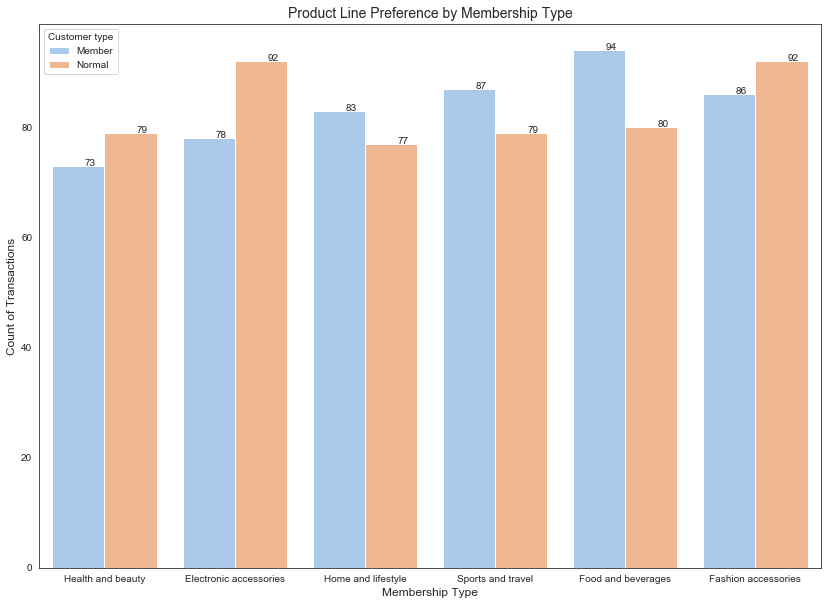

In [22]:
plt.figure(figsize=(14,10))
ax = sns.countplot(x='Product line', hue='Customer type', data=data , palette = 'pastel')
ax.set_xlabel("Membership Type", fontsize = 12)
ax.set_ylabel("Count of Transactions", fontsize = 12)
ax.set_title("Product Line Preference by Membership Type", fontsize = 14)

for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.savefig('../data/charts/product-line-preference-member-type.png')

In [10]:
data['Month'] = data['Date'].dt.month
sales = data.groupby(['Month','Product line'], as_index=False)['Total'].sum()

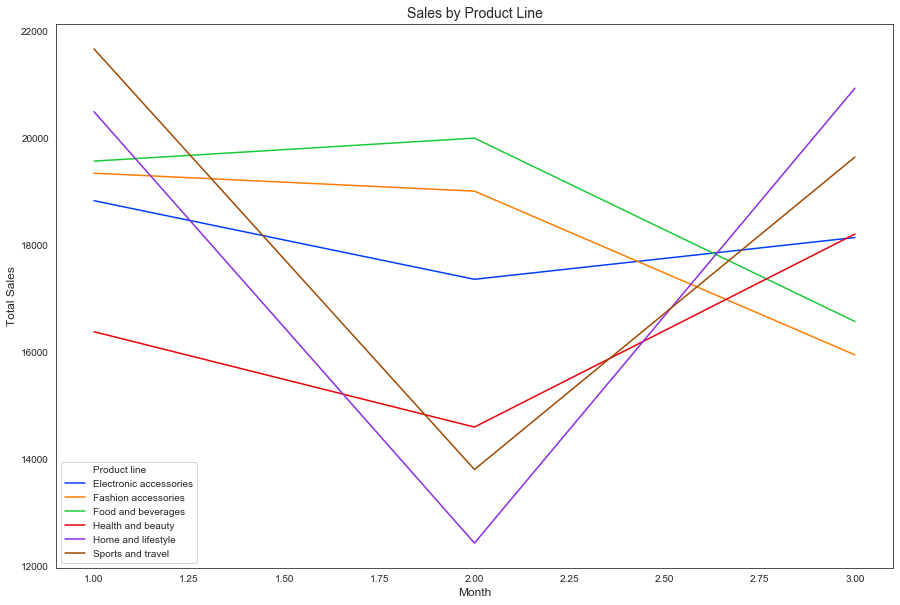

In [20]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x='Month', y='Total', hue= 'Product line', data=sales , palette = 'bright')
sns.set_style("white")
ax.set_xlabel("Month", fontsize = 12)
ax.set_ylabel("Total Sales", fontsize = 12)
ax.set_title("Sales by Product Line", fontsize = 14)

plt.savefig('../data/charts/sales-product-line.png')